In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [151]:
data = pd.read_csv("Social_Network_Ads.csv")

In [153]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [155]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [157]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [159]:
# Separate the features (X) and the target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [161]:
print(X)

[[15624510 'Male' 19 19000]
 [15810944 'Male' 35 20000]
 [15668575 'Female' 26 43000]
 ...
 [15654296 'Female' 50 20000]
 [15755018 'Male' 36 33000]
 [15594041 'Female' 49 36000]]


In [163]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [165]:
# Perform label encoding on the 'Gender' column

"""
In machine learning projects, we usually deal with datasets having different categorical columns where some columns have their elements in the ordinal variable category for e.g a column income level having elements as low, medium, or high in this case we can replace these elements with 1,2,3. where 1 represents ‘low’  2  ‘medium’  and 3′ high’. Through this type of encoding, we try to preserve the meaning of the element where higher weights are assigned to the elements having higher priority.

Label Encoding :
Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.
"""

le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

In [167]:
# Split the dataset into training and testing sets

"""
The train_test_split function of the sklearn.model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.
"""

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [169]:
# Create an instance of the Logistic Regression model
logistic_regression = LogisticRegression()

In [171]:
# Train the model on the training data
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [173]:
# Predict the labels for the test set
y_pred = logistic_regression.predict(X_test)

In [175]:
# Compute the confusion matrix

"""
A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance.
"""

confusion = confusion_matrix(y_test, y_pred)

In [177]:
# Extract the values from the confusion matrix

"""
True Positive (TP): It is the total counts having both predicted and actual values are Dog.
True Negative (TN): It is the total counts having both predicted and actual values are Not Dog.
False Positive (FP): It is the total counts having prediction is Dog while actually Not Dog.
False Negative (FN): It is the total counts having prediction is Not Dog while actually, it is Dog.
"""

TN = confusion[0, 0]  # True Negative
FP = confusion[0, 1]  # False Positive
FN = confusion[1, 0]  # False Negative
TP = confusion[1, 1]  # True Positive

In [179]:
# Compute the accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Compute the error rate
error_rate = (FP + FN) / (TP + TN + FP + FN)

# Compute the precision
precision = TP / (TP + FP)

# Compute the recall
recall = TP / (TP + FN)

In [181]:
# Print the confusion matrix and extracted values
print("Confusion Matrix:")
print(confusion)
print("\nDetailed Counts:")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")
print(f"True Positive (TP): {TP}")


Confusion Matrix:
[[50  2]
 [ 7 21]]

Detailed Counts:
True Negative (TN): 50
False Positive (FP): 2
False Negative (FN): 7
True Positive (TP): 21


In [183]:
# display the accuracy
print(accuracy)

0.8875


In [185]:
# display the error rate
print(error_rate)

0.1125


In [187]:
# display the precision
print(precision)

0.9130434782608695


In [189]:
# display the recall
print(recall)

0.75


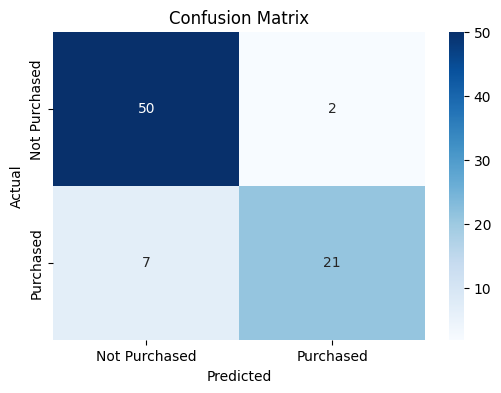

In [191]:
# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [195]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load your dataset
df = pd.read_csv("HousingData.csv")

# Check column names
print(df.columns)

# If 'MEDV' doesn't exist, drop columns that are not numeric
X = df.select_dtypes(include=["float64", "int64"])  # Select only numeric columns

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
X_minmax = minmax_scaler.fit_transform(X)
X_minmax_df = pd.DataFrame(X_minmax, columns=X.columns)
print("Min-Max Scaled Data (0-1 Range):")
print(X_minmax_df.head())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
Min-Max Scaled Data (0-1 Range):
       CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0  0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1  0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2  0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3  0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4  0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   

        RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1  0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2  0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3  0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4  0.086957  0.066794  0.648936  1.000000 

In [197]:
standard_scaler = StandardScaler()
X_standard = standard_scaler.fit_transform(X)
X_standard_df = pd.DataFrame(X_standard, columns=X.columns)
print("\nStandard Scaled Data (Z-score):")
print(X_standard_df.head())


Standard Scaled Data (Z-score):
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.413898  0.290525 -1.284840 -0.274265 -0.144217  0.413672 -0.118643   
1 -0.411488 -0.479864 -0.587798 -0.274265 -0.740262  0.194274  0.371156   
2 -0.411491 -0.479864 -0.587798 -0.274265 -0.740262  1.282714 -0.265225   
3 -0.410908 -0.479864 -1.303877 -0.274265 -0.835284  1.016303 -0.812226   
4 -0.406697 -0.479864 -1.303877 -0.274265 -0.835284  1.228577 -0.511911   

        DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.082105  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.500165 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.215000  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.367479  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052       NaN  1.487503  
